In [ ]:
!pip install seaborn
!pip install plotly

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

In [ ]:
df = pd.read_csv('/content/sample_data/Data.csv', delimiter=';')

## **Comportamiento del Consumidor en Retail de Moda: Precio, Promoción y Ubicación como Factores Clave de Venta**

## CÓMO ES EL DATASET

In [ ]:
df.shape

(252, 16)

Muestra:

El tamaño del dataset:
252 filas y 16 columnas → 252 productos con 16 variables cada uno.

Preguntas que responde:

*   ¿Cuántos productos hay en el dataset?
*  ¿Cuántas variables voy a analizar?




In [ ]:
df["price"].describe()

,price
count,252.000000
mean,86.252540
std,52.083205
min,7.990000
25%,49.900000
50%,79.900000
75%,109.000000
max,439.000000


Muestra:

Resumen estadístico del precio:
Mínimo: 7.99 USD
Máximo: 439 USD
Media: 86 USD
Mediana: 79.9 USD
La mayoría de precios están entre 49.9 y 109 USD.

Preguntas que responde:

* ¿Cuáles son los precios más bajos y más altos?
* ¿Qué precio es más típico (mediana)?
* ¿Hay mucha variación en los precios?
* ¿En qué rango se concentra la mayoría de productos?

In [ ]:
df.head(25)

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN


Muestra:

Muestra las primeras filas del dataset, es decir, ejemplos concretos de productos.

Se ven las columnas principales:
Product ID, Product Position, Promotion, Product Category, Seasonal, Sales Volume, brand, url, sku, name, description, price, currency, date, terms, gender.

Sirve para entender qué información contiene cada registro: qué producto es, cuánto cuesta, si está en promoción, en qué posición de la tienda está, cuántas unidades vende, etc.



Preguntas que responde:


*   ¿Qué tipo de información tengo en cada columna?
*   ¿Cómo es un producto típico en el dataset? (por ejemplo: una chaqueta, marca Zara, precio 129$, en End-cap, con o sin promo…)
*  ¿Los datos parecen coherentes y limpios? (precios realistas, textos completos, categorías claras)

In [ ]:
df.sort_values(by='price', ascending = [False]).head(10)

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
13,151396,Front of Store,Yes,Clothing,Yes,729,Zara,https://www.zara.com/us/en/cropped-leather-jac...,323134418-800-3,CROPPED LEATHER JACKET,Leather jacket. Cropped length. Lapel collar a...,439.0,USD,2024-02-19T08:50:13.771115,jackets,MAN
38,114877,Aisle,No,Clothing,No,1860,Zara,https://www.zara.com/us/en/suede-jacket-p02521...,323134415-700-3,SUEDE JACKET,Jacket made of suede. Cropped length. Lapel co...,349.0,USD,2024-02-19T08:50:29.497634,jackets,MAN
22,161909,Aisle,Yes,Clothing,No,1290,Zara,https://www.zara.com/us/en/leather-jacket-p054...,315529534-705-3,LEATHER JACKET,Relaxed fit jacket in leather. Spread collar a...,299.0,USD,2024-02-19T08:50:18.813979,jackets,MAN
60,151925,End-cap,Yes,Clothing,Yes,2179,Zara,https://www.zara.com/us/en/vintage-effect-leat...,320774184-800-97,VINTAGE EFFECT LEATHER BOMBER JACKET,NaN,299.0,USD,2024-02-19T08:50:43.543555,jackets,MAN
67,154016,End-cap,Yes,Clothing,Yes,2366,Zara,https://www.zara.com/us/en/wool-blend-textured...,328244979-064-48,WOOL BLEND TEXTURED JACKET,Jacket made of wool blend fabric. Pointed lape...,189.0,USD,2024-02-19T08:50:48.692260,jackets,MAN
24,183243,Front of Store,Yes,Clothing,No,1524,Zara,https://www.zara.com/us/en/suit-jacket-p043032...,328250627-251-46,SUIT JACKET,Straight fit jacket made of dense stretch fabr...,169.0,USD,2024-02-19T08:50:19.899287,jackets,MAN
12,134693,Aisle,Yes,Clothing,No,2124,Zara,https://www.zara.com/us/en/leather-biker-jacke...,311297791-800-2,LEATHER BIKER JACKET,Jacket with lapel collar and snap button detai...,169.0,USD,2024-02-19T08:50:13.210501,jackets,MAN
9,137121,Aisle,No,Clothing,Yes,656,Zara,https://www.zara.com/us/en/100-feather-fill-pu...,312372602-800-2,100% FEATHER FILL PUFFER JACKET,Puffer jacket made of shiny finish technical f...,169.0,USD,2024-02-19T08:50:11.380061,jackets,MAN
88,123824,Aisle,Yes,Clothing,No,2277,Zara,https://www.zara.com/us/en/wool-blend-suit-jac...,322901350-800-46,WOOL BLEND SUIT JACKET,Straight fit jacket made of wool blend fabric....,169.0,USD,2024-02-19T08:51:04.381493,jackets,MAN
87,152723,Aisle,No,Clothing,Yes,2849,Zara,https://www.zara.com/us/en/longline-quilted-ja...,316683359-818-2,LONGLINE QUILTED JACKET,Parka made of technical fabric with padded int...,169.0,USD,2024-02-19T08:51:03.976837,jackets,MAN


Muestra:

Muestra los 10 productos más caros del dataset, ordenados de mayor a menor precio.
Podemos ver su posición en la tienda, si tienen promoción, el volumen de ventas, su categoría, nombre y descripción.



Preguntas que responde:

*  ¿Cuáles son los productos más caros de la tienda?
*   ¿Los productos caros están en zonas premium como “Front of Store” o en Aisle?
* ¿Qué tipos de productos tienden a ser los más caros? (por ejemplo, chaquetas de cuero, bomber jackets, etc.)
*   ¿Tienen promoción o no?
*   ¿Venden mucho o poco comparado con su precio?


In [ ]:
df.sort_values(by=['terms', 'price'], ascending = [False, True]).head(10)


,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
210,142257,Aisle,Yes,Clothing,Yes,1180,Zara,https://www.zara.com/us/en/basic-slim-fit-t-sh...,315241755-800-2,BASIC SLIM FIT T-SHIRT,Slim fit shirt. Round neck and short sleeves.,19.90,USD,2024-02-19T08:56:26.127459,t-shirts,MAN
234,185774,End-cap,Yes,Clothing,Yes,1145,Zara,https://www.zara.com/us/en/knit-sweater-with-b...,316727555-700-2,FAUX SUEDE BOMBER JACKET,Overshirt with lapel collar and long sleeves w...,19.99,USD,2024-02-19T09:10:35.641404,t-shirts,MAN
218,159816,Front of Store,No,Clothing,Yes,1961,Zara,https://www.zara.com/us/en/basic-medium-weight...,318255748-250-2,BASIC MEDIUM WEIGHT T-SHIRT,Regular fit T-shirt. Round neck and short slee...,27.90,USD,2024-02-19T08:56:30.594950,t-shirts,MAN
212,129134,Aisle,No,Clothing,Yes,1831,Zara,https://www.zara.com/us/en/basic-heavyweight-t...,316715458-250-2,BASIC HEAVYWEIGHT T-SHIRT,Roomy T-shirt made of dense cotton. Round neck...,29.90,USD,2024-02-19T08:56:27.459508,t-shirts,MAN
211,126146,Aisle,No,Clothing,No,2759,Zara,https://www.zara.com/us/en/cropped-washed-t-sh...,320326523-707-2,CROPPED WASHED T-SHIRT,Cropped fit T-shirt with round neck and short ...,39.90,USD,2024-02-19T08:56:26.653517,t-shirts,MAN
213,129898,End-cap,No,Clothing,No,1866,Zara,https://www.zara.com/us/en/heart-print-t-shirt...,322677489-800-2,HEART PRINT T-SHIRT,Boxy fit T-shirt with round neck and short sle...,39.90,USD,2024-02-19T08:56:27.954174,t-shirts,MAN
214,189692,End-cap,Yes,Clothing,No,1553,Zara,https://www.zara.com/us/en/text-t-shirt-p00962...,330077856-251-2,TEXT T-SHIRT,Boxy fit T-shirt. Round neck and short sleeves...,39.90,USD,2024-02-19T08:56:28.447616,t-shirts,MAN
215,154846,End-cap,Yes,Clothing,No,917,Zara,https://www.zara.com/us/en/printed-cropped-fit...,328232452-898-2,PRINTED CROPPED FIT SHIRT LIMITED EDITION,Cropped shirt. Round neckline. Contrasting fro...,39.90,USD,2024-02-19T08:56:28.979960,t-shirts,MAN
217,182099,Aisle,Yes,Clothing,No,1978,Zara,https://www.zara.com/us/en/oversize-fit-t-shir...,330478123-712-2,OVERSIZE FIT T-SHIRT,Oversized T-shirt. Round neck and short sleeves.,39.90,USD,2024-02-19T08:56:30.052250,t-shirts,MAN
220,185154,Aisle,Yes,Clothing,No,996,Zara,https://www.zara.com/us/en/abstract-print-t-sh...,311307261-712-2,ABSTRACT PRINT T-SHIRT,Full cut T-shirt with crew neck and short slee...,39.90,USD,2024-02-19T08:56:31.723585,t-shirts,MAN


Muestra:

Los 10 primeros productos de la tabla ordenados por:


*   terms (categoría del producto) de forma descendente. Es simplemente orden alfabético inverso. En este caso nos sale t-shirts

*   price (precio) de menor a mayor dentro de cada categoría.


Preguntas que responde:
* ¿Cuáles son los productos más baratos dentro de la categoría T-shirts?
* ¿Los más baratos dentro de esta categoría se venden durante una promoción en mayor cantidad?
* ¿Cómo cambian los precios mínimos dentro de la categoría?


# Distribución del precio

In [ ]:
price_distribution = df.groupby('terms')['price'].describe()
print(price_distribution)

          count        mean        std    min      25%   50%      75%    max
terms                                                                       
jackets   140.0  105.757929  56.844204  12.99  69.9675  89.9  129.000  439.0
jeans       8.0   63.923750  26.677528  12.99  57.4000  69.9   69.900  109.0
shoes      31.0   64.873548  21.832082   9.99  49.9000  69.9   74.900   99.9
sweaters   41.0   54.862683  30.899477   7.99  45.9000  49.9   59.900  169.0
t-shirts   32.0   67.427813  40.600299  19.90  39.9000  45.9  102.175  169.0


Muestra:

resumen estadístico del precio en cada categoría (terms): cuántos productos hay, el precio medio, la variabilidad, y los valores mínimos, máximos y percentiles (25%, 50%, 75%).
En resumen: cómo es el precio típico en cada categoría.

Preguntas:

* ¿Qué categoría es más cara y cuál es más barata?
Los valores de mean y max lo indican claramente (por ejemplo, jackets es la categoría más cara).
* ¿Cómo se distribuyen los precios dentro de cada categoría?
Percentiles (25%, 50%, 75%) muestran si una categoría tiene precios concentrados o muy dispersos.
* ¿Qué categoría tiene más variabilidad en los precios?
Lo indica std: sweaters y t-shirts tienen menos variación; jackets, mucha más.
* ¿Cuál es el rango de precios dentro de cada categoría?
Comparación entre min y max.
* ¿Qué categoría tiene más productos disponibles?
Lo indica count.





# Volumen total de ventas por categoria de producto

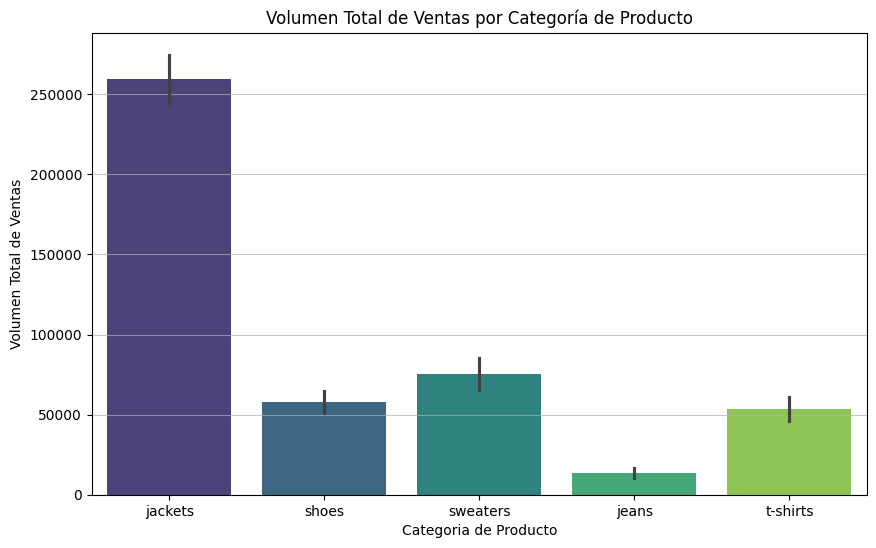

In [ ]:
azplt.figure(figsize=(10, 6))
sns.barplot(x='terms', y='Sales Volume', data=df, estimator=sum, hue='terms', palette='viridis', legend=False)
plt.title('Volumen Total de Ventas por Categoría de Producto')
plt.xlabel('Categoria de Producto')
plt.ylabel('Volumen Total de Ventas')
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()

Muestra:
*   Jackets vende más que todas las demás categorías combinadas.
*   Shoes, sweaters y t-shirts están en un rango medio muy por debajo.
*   Jeans vende menos
*   El gráfico muestra la diferencia en ventas totales entre categorías, revelando cuáles son tus productos estrella y cuáles no están funcionando tan bien.

Preguntas que responde:

¿Cuál es la categoría que más vende?
¿Hay categorías que están rindiendo muy por debajo?
¿Hay brechas grandes entre categorías?
¿Tiene sentido invertir más en ciertas categorías?

# Distribución de precios por categoría de ropa



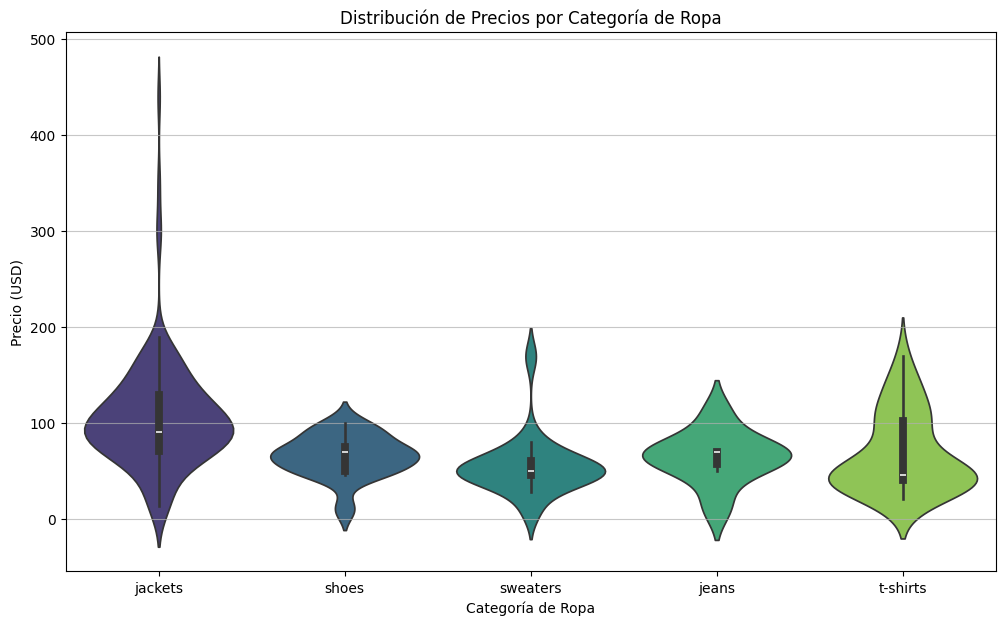

In [ ]:
plt.figure(figsize=(12, 7))
sns.violinplot(x='terms', y='price', data=df, hue='terms', palette='viridis', legend=False)
plt.title('Distribución de Precios por Categoría de Ropa')
plt.xlabel('Categoría de Ropa')
plt.ylabel('Precio (USD)')
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()

Muestra
*   La distribución completa de los precios por categoría.
*   Forma de la distribución, densidad, simetría, sesgos, valores altos o bajos comunes.
*   Es ideal para entender cómo se comporta price.
*   Jackets tiene la mayor variabilidad: precios desde muy bajos hasta picos bastante altos.
*   T-shirts también muestra bastante dispersión, con una cola hacia precios altos.
*   Shoes, sweaters y jeans parecen más “compactos”, con menos variación.
*   La mediana de cada categoría está más o menos centrada dentro de cada violín, pero cambia según categoría (por ejemplo, jackets y t-shirts tienden a tener medianas algo más altas que sweaters).

Preguntas que responde
*   ¿Qué categoría tiene precios más altos en general?
*   ¿Cuál tiene más variabilidad?
*   ¿Hay precios extremos?

Muestra
*   La suma del volumen de ventas por categoría.
*   Dice cuánto se vendió en total.

Preguntas que responde
*   ¿Qué categoría vendió más unidades?
*   ¿Cuál vendió menos?

# Volumen de ventas vs. Precio

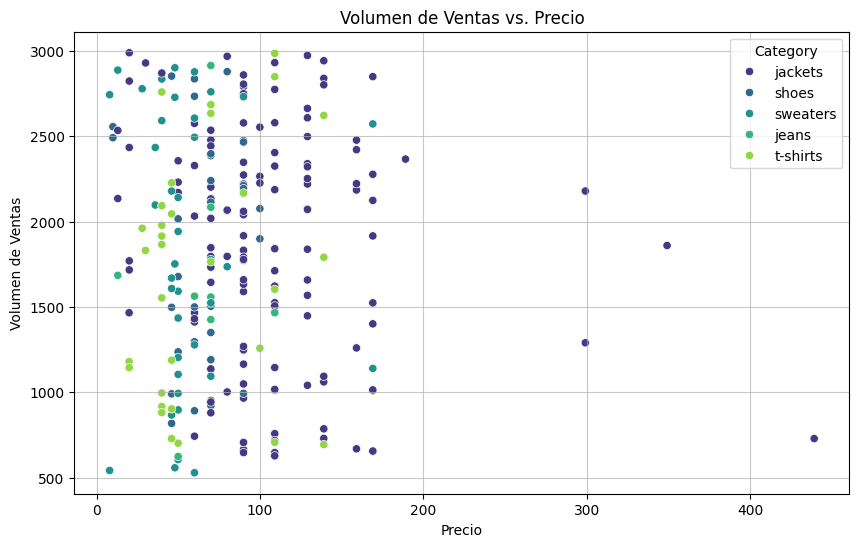

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='Sales Volume', data=df, hue='terms', palette='viridis')
plt.title('Volumen de Ventas vs. Precio')
plt.xlabel('Precio')
plt.ylabel('Volumen de Ventas')
plt.grid(True, linestyle='-', alpha=0.7)
plt.legend(title='Category')
plt.show()

Muestra
*   La relación entre dos variables: price y Sales Volume.
*   Si los productos más caros venden más o menos.
*   La nube más densa está entre: Precio: 0–120 y Volumen: 1500–3000. Esto sugiere que los productos más baratos se venden bastante más.
*   A medida que sube el precio, baja el volumen de ventas.
*   T-shirts y jeans (verdes) se concentran bastante entre 20 y 80. Y dentro de ese rango venden muy bien.

Preguntas que responde

*   ¿A mayor precio, se vende menos?
*   ¿Hay correlación positiva o negativa?
*   ¿Cada categoría sigue un patrón diferente?

# Ventas de promoción y sin promoción

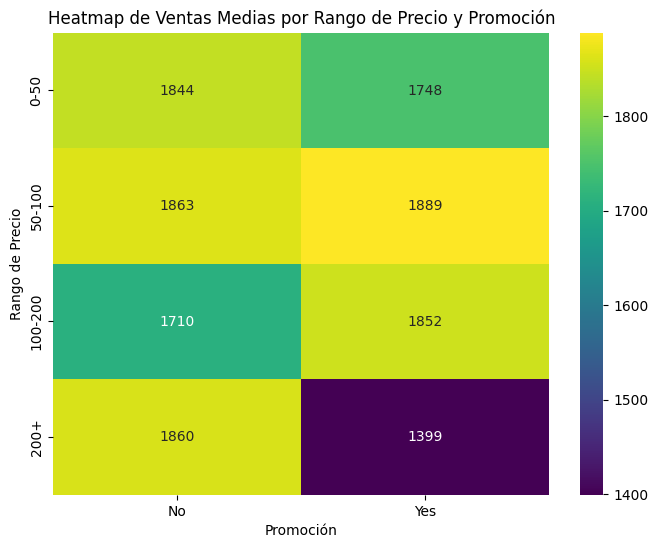

In [ ]:
bins = [0, 50, 100, 200, float('inf')]
labels = ['0-50', '50-100', '100-200', '200+']
df['Price Range'] = pd.cut(df['price'], bins=bins, labels=labels)

heatmap_data = df.groupby(['Price Range', 'Promotion'], observed=False)['Sales Volume'].mean().unstack()

plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='viridis')
plt.title('Heatmap de Ventas Medias por Rango de Precio y Promoción')
plt.xlabel('Promoción')
plt.ylabel('Rango de Precio')
plt.show()

Muestra:

* Este gráfico compara las ventas medias según rangos de precio y si el producto está en promoción o no. Permite ver de forma sencilla cómo afecta el precio y la promoción al nivel de ventas.
*   Cómo cambia el comportamiento del consumidor según el precio, la promoción
*   Dónde la promo es útil, dónde es inútil y dónde incluso perjudica
  La promoción no siempre funciona igual. No hay un “sí o sí aumenta las ventas”. Depende mucho del rango de precio.
*   Las promos funcionan solo en precios medios. En baratos no hacen falta, y en caros pueden ser contraproducentes.

Preguntas responde:
*   ¿Qué rango de precio vende más o menos?
*   ¿La promoción aumenta o reduce las ventas?
*   ¿El efecto de la promoción cambia según el precio del producto?






# Volumen total de ventas por posición del producto

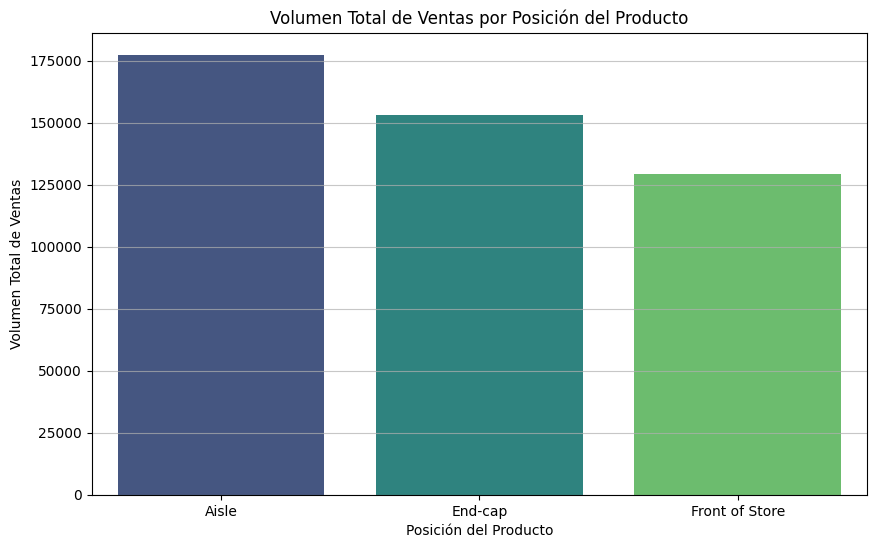

In [ ]:
sales_by_position = df.groupby('Product Position')['Sales Volume'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Product Position', y='Sales Volume', data=sales_by_position, palette='viridis', hue='Product Position', legend=False)
plt.title('Volumen Total de Ventas por Posición del Producto')
plt.xlabel('Posición del Producto')
plt.ylabel('Volumen Total de Ventas')
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()

Muestra:
*   Muestra comparaciones directas entre posiciones.
*   Visualiza cómo el lugar donde aparece un producto influye en las ventas acumuladas.
*   El volumen total de ventas agrupado por Product Position.

Preguntas que responde
*   ¿Hay alguna posición que vende significativamente menos?
*   ¿Existe una tendencia clara donde la posición afecta el volumen de ventas?
*   ¿Qué posición del producto genera más ventas totales?

# Efecto de la promoción por posición del producto

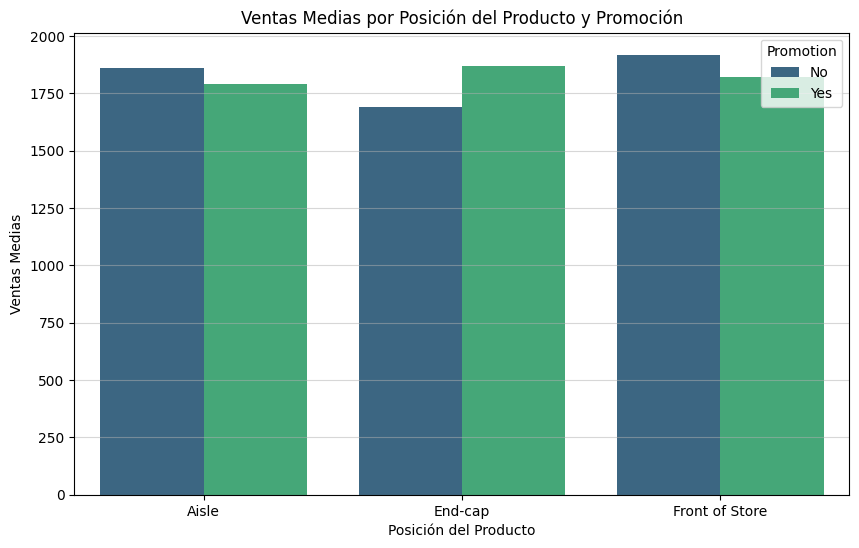

In [ ]:
sales_pos_promo = df.groupby(['Product Position', 'Promotion'])['Sales Volume'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    x='Product Position',
    y='Sales Volume',
    hue='Promotion',
    data=sales_pos_promo,
    palette='viridis'
)

plt.title('Ventas Medias por Posición del Producto y Promoción')
plt.xlabel('Posición del Producto')
plt.ylabel('Ventas Medias')
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

Muestra:
* Sirve para ver si la efectividad de las promociones depende de dónde está colocado el producto dentro de la tienda.
* Revela si vale la pena promocionar un producto en una zona u otra.
*   Aisle → En los pasillos, la gente compra igual, no necesitan el descuento.
*   End-cap→ Zonas de mucho impacto visual, así que una rebaja allí se nota.
*   Front of Store → Se suele comprar por impulso, no porque esté rebajado.

Preguntas que responde:

¿Las promociones funcionan mejor en pasillos, cabeceras o en la entrada?

¿Dónde se vende más sin necesidad de promociones?

¿En qué zona la promoción aumenta o reduce las ventas?

-----

# RESUMEN DEL DATASET

Las ventas en retail de moda dependen principalmente del precio, la categoría del producto, la promoción y su ubicación en la tienda. Las promociones solo funcionan bien en rangos de precio medios y en cabeceras, mientras que los productos premium y los ubicados en pasillos o entrada no mejoran —e incluso  empeoran— con descuentos.